In [1]:
# Import the required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# Load the Boston Housing Dataset
file_path = 'house_dataset.csv'  # Update this to the actual file path if needed
housing_data = pd.read_csv(file_path,index_col=0)
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
# Check for missing values
if housing_data.isnull().sum().any():
    print("Missing values found, handling...")
    housing_data = housing_data.dropna()
else:
    print("No Missing data found in the entire dataset")

No Missing data found in the entire dataset


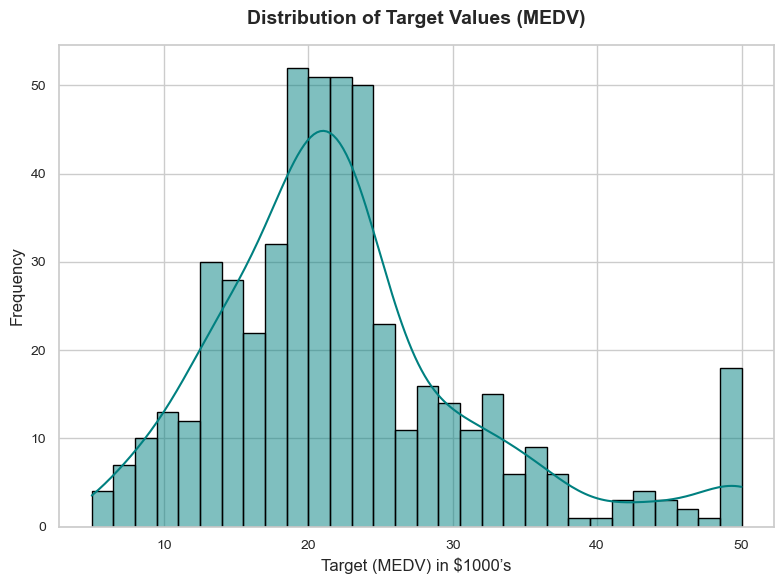

In [4]:
# Data Visualization
# Set style and figure size
sns.set_theme(style="whitegrid")  # Use a clean grid style
plt.figure(figsize=(8, 6))  # Slightly larger size for better visibility
# Create histogram
sns.histplot(housing_data['target'],bins=30,kde=True,color="teal",edgecolor="black")
# Update title and axis labels
plt.title("Distribution of Target Values (MEDV)", fontsize=14,weight="bold", pad=15)
plt.xlabel("Target (MEDV) in $1000’s", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

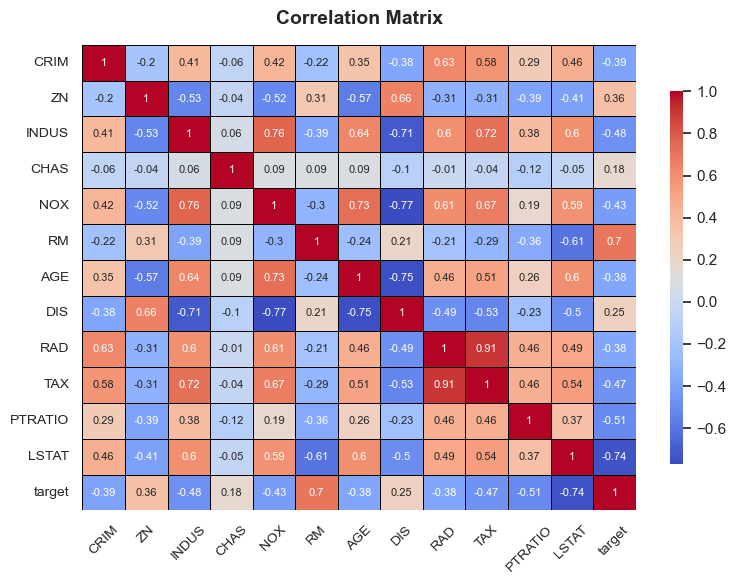

In [5]:
# Correlation matrix
correlation_matrix = housing_data.corr().round(2)

# Create a heatmap with updated visual settings
plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    annot_kws={"size": 8},  # Smaller font size for annotations
    cmap="coolwarm",  # Attractive color scheme
    linewidths=0.5,  # Add spacing between cells
    linecolor="black",  # Define line color for separation
    cbar_kws={"shrink": 0.8, "aspect": 30},  # Customize color bar size
)

# Title with updated font and positioning
plt.title(
    "Correlation Matrix",
    fontsize=14,  # Slightly larger font for title
    weight="bold",
    pad=15,  # Add padding above the title
)

plt.xticks(fontsize=10, rotation=45)  # Adjust x-axis font size and angle
plt.yticks(fontsize=10, rotation=0)  # Adjust y-axis font size and keep labels horizontal
plt.tight_layout()  # Ensure the layout is compact
plt.show()


In [6]:
# Compute the correlation matrix
correlation_matrix = housing_data.corr()

# Get the correlation of each feature with the target variable MEDV
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print("Correlation of features with Target:\n")
print(correlation_with_target)

Correlation of features with Target:

target     1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64


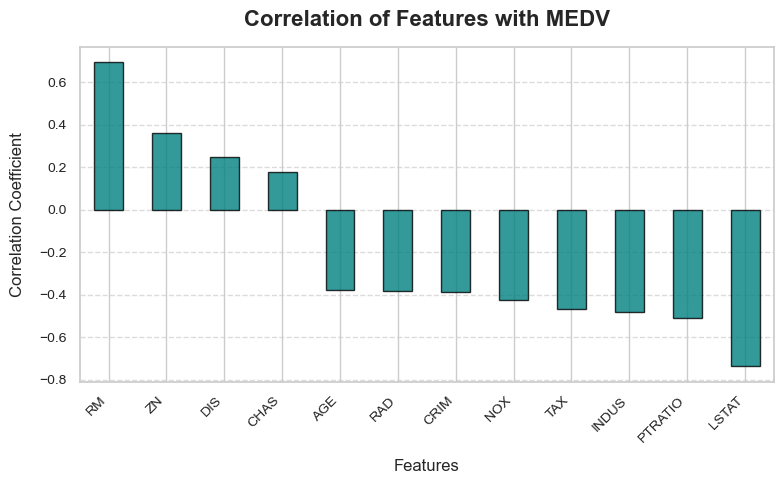

In [7]:
# Create a more visually appealing bar plot
plt.figure(figsize=(8, 5))  # Slightly larger figure for better visibility

correlation_with_target.drop('target').plot(
    kind='bar',
    color='teal',  # Attractive color for bars
    edgecolor='black',  # Black edges for better distinction
    alpha=0.8  # Transparency for a softer look
)

# Add title and labels with improved formatting
plt.title(
    "Correlation of Features with MEDV",
    fontsize=16,
    weight='bold',
    pad=15  # Padding above the title
)
plt.xlabel("Features", fontsize=12, labelpad=10)  # Add x-axis label and padding
plt.ylabel("Correlation Coefficient", fontsize=12, labelpad=10)

# Customize tick labels
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotate for readability
plt.yticks(fontsize=10)

# Add grid for easier interpretation
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for neat appearance
plt.tight_layout()
plt.show()


In [8]:
# Feature importance using the Linear Regression model
lin_model = LinearRegression()
X = housing_data.drop(columns=['target'])  # All features except the target
Y = housing_data['target']

# Fit the model
lin_model.fit(X, Y)

# Get feature coefficients
feature_importance = pd.Series(lin_model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\nFeature importance based on coefficients:\n")
print(feature_importance)


Feature importance based on coefficients:

NOX       -18.758022
RM          3.658119
CHAS        2.839993
DIS        -1.490754
PTRATIO    -0.937533
LSTAT      -0.552019
RAD         0.289405
CRIM       -0.121389
ZN          0.046963
INDUS       0.013468
TAX        -0.012682
AGE         0.003611
dtype: float64


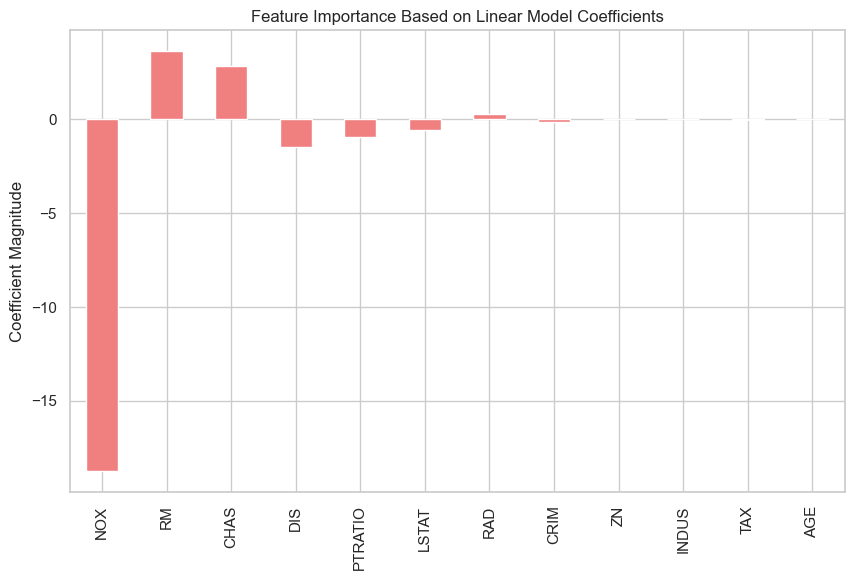

In [9]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='lightcoral')
plt.title("Feature Importance Based on Linear Model Coefficients")
plt.ylabel("Coefficient Magnitude")
plt.show()

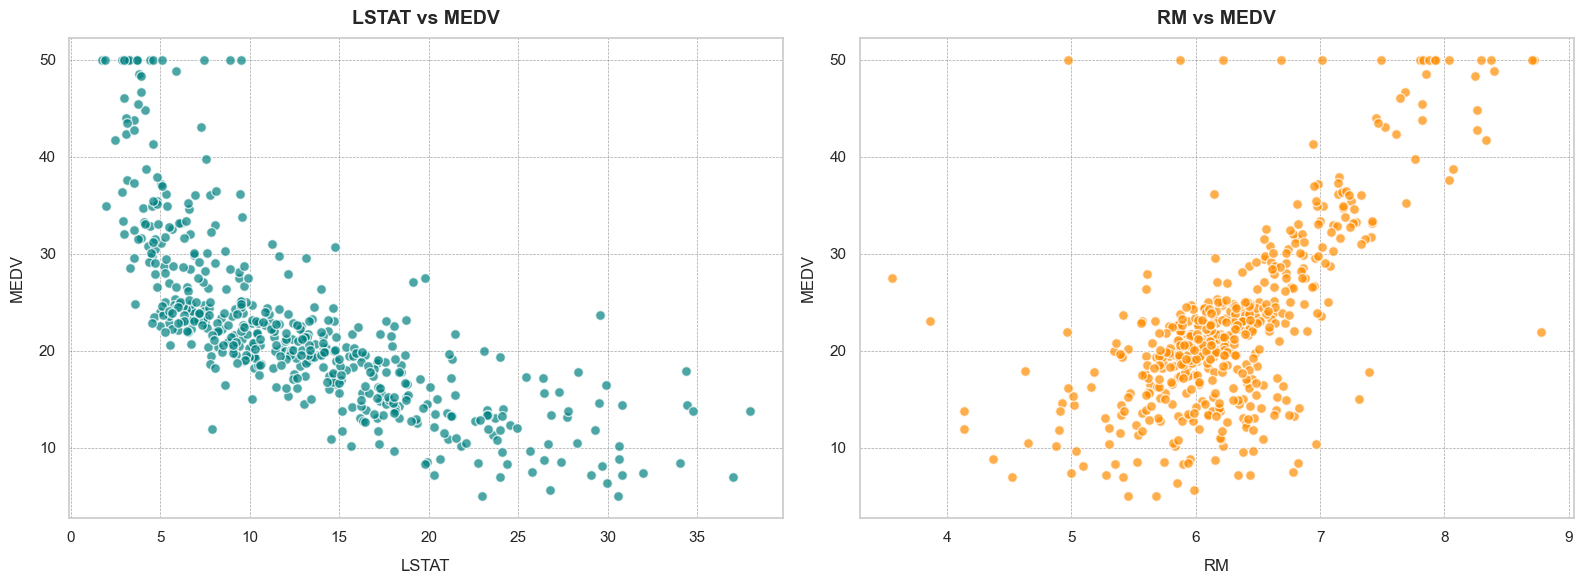

In [10]:
# Set up the figure with a larger size
plt.figure(figsize=(16, 6))

# Define features and target
features = ['LSTAT', 'RM']
target = housing_data['target']
colors = ['teal', 'darkorange']  # Two different colors for the plots

# Loop through each feature to create individual scatter plots
for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)  # Create subplots side by side
    x = housing_data[col]
    y = target
    
    # Scatter plot with distinct colors
    plt.scatter(x, y, color=colors[i], alpha=0.7, edgecolor='white', s=50)
    
    # Add titles and labels with improved formatting
    plt.title(f'{col} vs MEDV', fontsize=14, weight='bold', pad=10)
    plt.xlabel(col, fontsize=12, labelpad=10)
    plt.ylabel('MEDV', fontsize=12, labelpad=10)
    
    # Add gridlines for better readability
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout for a clean look
plt.tight_layout()
plt.show()



In [11]:
# Prepare the data for training
X = pd.DataFrame(np.c_[housing_data['LSTAT'], housing_data['RM']], columns=['LSTAT', 'RM'])
Y = housing_data['target']

In [12]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [13]:
# Train the model using sklearn LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [14]:
# Model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2_train = r2_score(Y_train, y_train_predict)

In [15]:
print("The model performance for training set")
print("--------------------------------------")
print(f'RMSE is {rmse_train}')
print(f'R2 score is {r2_train}')
print("\n")

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701




In [16]:
# Model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

In [17]:
print("The model performance for testing set")
print("--------------------------------------")
print(f'RMSE is {rmse_test}')
print(f'R2 score is {r2_test}')

The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


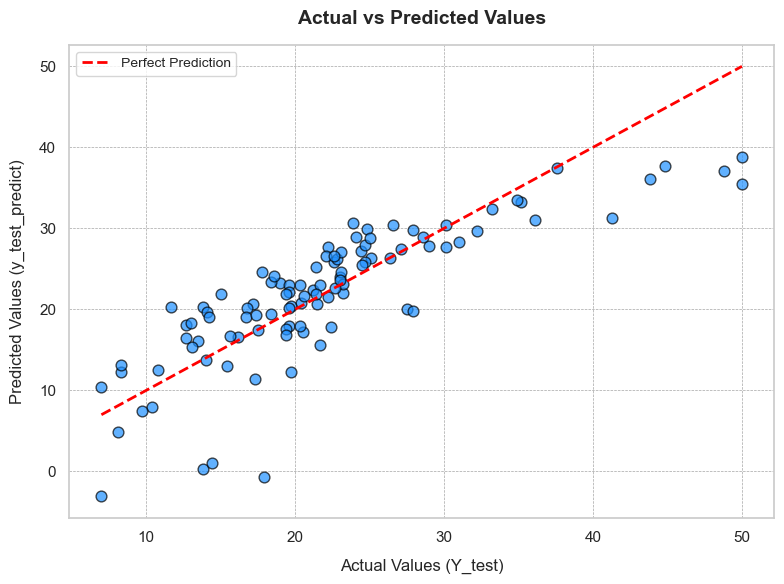

In [19]:
# Plotting the y_test vs y_pred
# Enhanced scatter plot
plt.figure(figsize=(8, 6))  # Set figure size for better readability
plt.scatter(Y_test, y_test_predict, color='dodgerblue', edgecolor='black', alpha=0.7, s=60)

# Add a diagonal line for reference (perfect prediction line)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title with improved formatting
plt.xlabel("Actual Values (Y_test)", fontsize=12, labelpad=10)
plt.ylabel("Predicted Values (y_test_predict)", fontsize=12, labelpad=10)
plt.title("Actual vs Predicted Values", fontsize=14, weight='bold', pad=15)

# Add gridlines for readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend for the perfect prediction line
plt.legend(fontsize=10)

# Tight layout for clean appearance
plt.tight_layout()
plt.show()


Training set shape: (404, 12)
Testing set shape: (102, 12)
The model performance for the training set:
-------------------------------------------
RMSE: 4.8277561238942335
R2 Score: 0.7286755692601041


The model performance for the testing set:
------------------------------------------
RMSE: 4.465624197134255
R2 Score: 0.7452955154721534


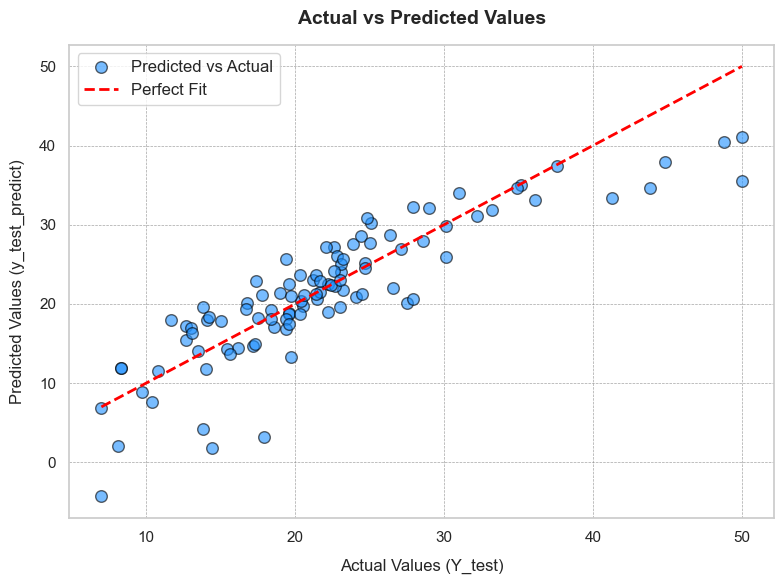

In [20]:
# Separate features (X) and target (Y)
X = housing_data.drop(columns=['target'])  # Exclude the target variable
Y = housing_data['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Train the model using sklearn LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# Model evaluation for the training set
y_train_predict = lin_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2_train = r2_score(Y_train, y_train_predict)

print("The model performance for the training set:")
print("-------------------------------------------")
print(f'RMSE: {rmse_train}')
print(f'R2 Score: {r2_train}')
print("\n")

# Model evaluation for the testing set
y_test_predict = lin_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

print("The model performance for the testing set:")
print("------------------------------------------")
print(f'RMSE: {rmse_test}')
print(f'R2 Score: {r2_test}')

# Enhanced Plotting: Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_test_predict, color="dodgerblue", edgecolor='black', alpha=0.6, s=70, label="Predicted vs Actual")

# Adding a Perfect Fit Line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="red", linestyle='--', linewidth=2, label="Perfect Fit")

# Adding labels, title, and legend
plt.xlabel("Actual Values (Y_test)", fontsize=12, labelpad=10)
plt.ylabel("Predicted Values (y_test_predict)", fontsize=12, labelpad=10)
plt.title("Actual vs Predicted Values", fontsize=14, weight='bold', pad=15)
plt.legend(fontsize=12)

# Adding gridlines for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()
